# opencv course
# A presentation by Mohammad Kahkeshani
### instagram:
#### codevision_academy
#### kahkeshani_mohammad

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

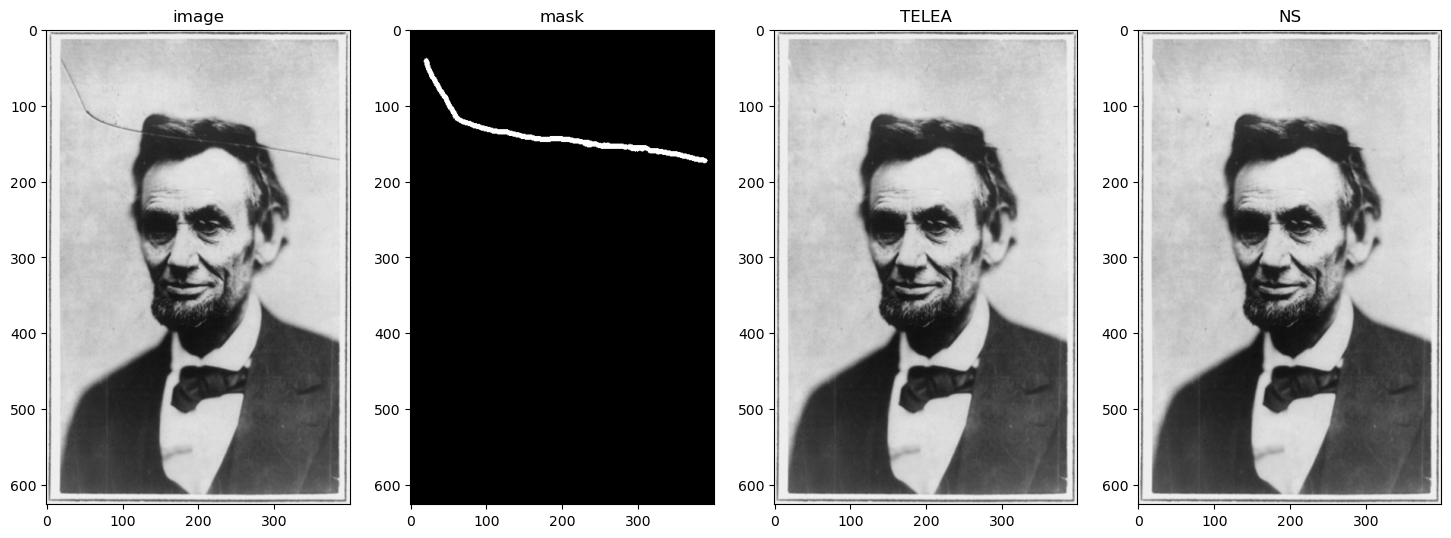

In [3]:
image = cv2.imread("images/Lincoln.jpg")
mask = cv2.imread("images/inpaintMask.png",0) #single channel

res_telea = cv2.inpaint(src=image, inpaintMask=mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)
res_ns = cv2.inpaint(src=image, inpaintMask=mask, inpaintRadius=3, flags=cv2.INPAINT_NS)


plt.figure(figsize=[18,7])
plt.subplot(141);plt.imshow(image[...,::-1]);plt.title("image");
plt.subplot(142);plt.imshow(mask, cmap='gray');plt.title("mask");
plt.subplot(143);plt.imshow(res_telea[...,::-1]);plt.title("TELEA");
plt.subplot(144);plt.imshow(res_ns[...,::-1]);plt.title("NS");

### Function for draw

In [6]:
def draw_with_mouse(event, x, y, flags, param):
    global drawing, mask, clone
    
    if event == cv2.EVENT_LBUTTONDOWN:  
        drawing = True
    elif event == cv2.EVENT_MOUSEMOVE and drawing:
        cv2.circle(mask, (x, y), 5, 255, -1)        
        cv2.circle(clone, (x, y), 5, (0, 0, 255), -1) 
    elif event == cv2.EVENT_LBUTTONUP:  
        drawing = False

### Inpainting

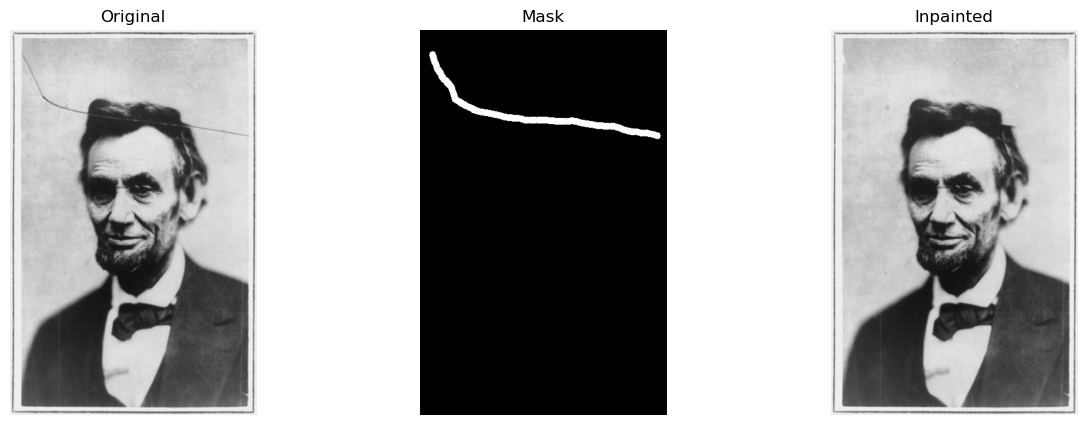

In [7]:
import cv2
import numpy as np

 
image = cv2.imread("images/Lincoln.jpg")
clone = image.copy()


mask = np.zeros(image.shape[:2], dtype=np.uint8)

drawing = False  

cv2.namedWindow("Draw mask")
cv2.setMouseCallback("Draw mask", draw_with_mouse)

while True:
    cv2.imshow("Draw mask", clone)
    cv2.imshow("Mask", mask)

    key = cv2.waitKey(1) & 0xFF
    if key == ord("i"):  
        result = cv2.inpaint(image, mask, 5, cv2.INPAINT_NS)
        cv2.imshow("Inpaint result", result)
    elif key == ord("r"):  
        clone = image.copy()
        mask[:] = 0
    elif key == 27:  
        break

cv2.destroyAllWindows()

if result is not None:
    plt.figure(figsize=(15,5))
    plt.subplot(131); plt.imshow(image[...,::-1]); plt.title("Original"); plt.axis("off")
    plt.subplot(132); plt.imshow(mask, cmap="gray"); plt.title("Mask"); plt.axis("off")
    plt.subplot(133); plt.imshow(result[...,::-1]); plt.title("Inpainted"); plt.axis("off")
    plt.show()


### Inpainting and Blur

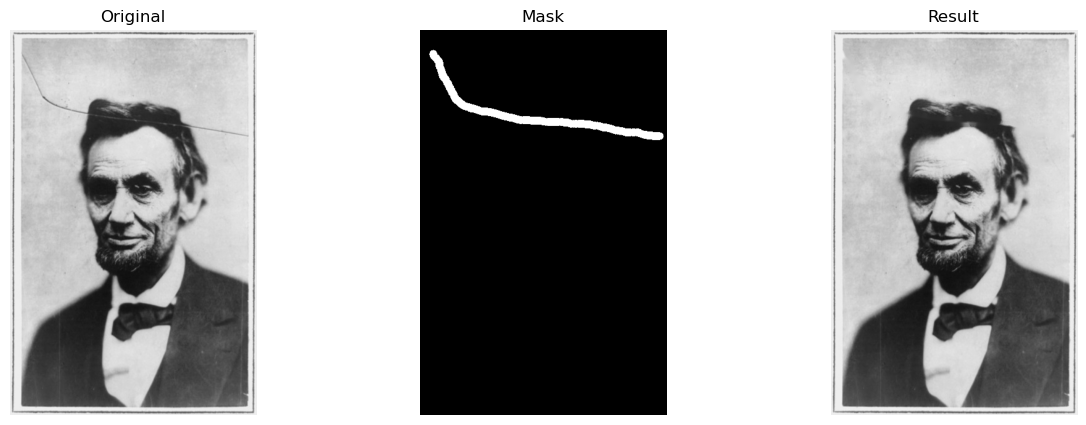

In [30]:
image = cv2.imread("images/Lincoln.jpg")
clone = image.copy()


mask = np.zeros(image.shape[:2], dtype=np.uint8)

drawing = False
result = None

cv2.namedWindow("Draw mask")
cv2.setMouseCallback("Draw mask", draw_with_mouse)

while True:
    cv2.imshow("Draw mask", clone)
    cv2.imshow("Mask", mask)

    key = cv2.waitKey(1) & 0xFF
    if key == ord("i"):  
        result = cv2.inpaint(image, mask, 3, cv2.INPAINT_TELEA)
        cv2.imshow("Result", result)
    elif key == ord("b"): 
        blurred = cv2.GaussianBlur(image, (25, 25), 0)
        result = image.copy()
        result[mask == 255] = blurred[mask == 255]
        cv2.imshow("Result", result)
    elif key == ord("r"):  
        clone = image.copy()
        mask[:] = 0
        result = None
    elif key == 27:  
        break

cv2.destroyAllWindows()


if result is not None:
    plt.figure(figsize=(15,5))
    plt.subplot(131); plt.imshow(image[...,::-1]); plt.title("Original"); plt.axis("off")
    plt.subplot(132); plt.imshow(mask, cmap="gray"); plt.title("Mask"); plt.axis("off")
    plt.subplot(133); plt.imshow(result[...,::-1]); plt.title("Result"); plt.axis("off")
    plt.show()


### Another Image

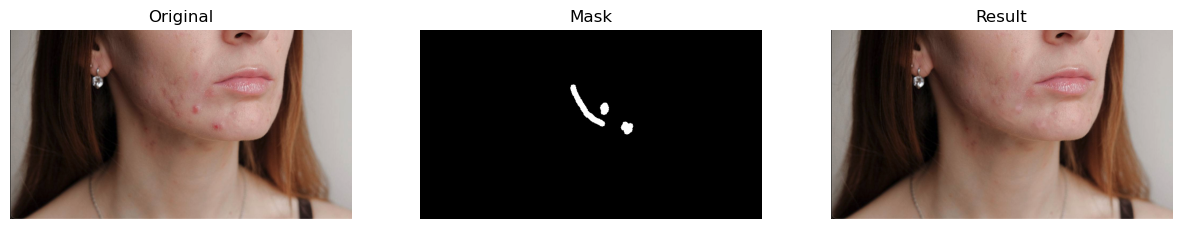

In [8]:
image = cv2.imread("images/blemish.png")
clone = image.copy()


mask = np.zeros(image.shape[:2], dtype=np.uint8)

drawing = False
result = None

cv2.namedWindow("Draw mask")
cv2.setMouseCallback("Draw mask", draw_with_mouse)

while True:
    cv2.imshow("Draw mask", clone)
    cv2.imshow("Mask", mask)

    key = cv2.waitKey(1) & 0xFF
    if key == ord("i"):  
        result = cv2.inpaint(image, mask, 3, cv2.INPAINT_TELEA)
        cv2.imshow("Result", result)
    elif key == ord("b"): 
        blurred = cv2.GaussianBlur(image, (25, 25), 0)
        result = image.copy()
        result[mask == 255] = blurred[mask == 255]
        cv2.imshow("Result", result)
    elif key == ord("r"):  
        clone = image.copy()
        mask[:] = 0
        result = None
    elif key == 27:  
        break

cv2.destroyAllWindows()


if result is not None:
    plt.figure(figsize=(15,5))
    plt.subplot(131); plt.imshow(image[...,::-1]); plt.title("Original"); plt.axis("off")
    plt.subplot(132); plt.imshow(mask, cmap="gray"); plt.title("Mask"); plt.axis("off")
    plt.subplot(133); plt.imshow(result[...,::-1]); plt.title("Result"); plt.axis("off")
    plt.show()
